In [2]:
import re #for regualar expression
import nltk
import string
import warnings
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
pd.set_option('display.max_colwidth',200)
warnings.filterwarnings('ignore',category=DeprecationWarning)
%matplotlib inline

In [3]:
test=pd.read_csv('D:/tweetsClassification/test_tweets_anuFYb8.csv')
train=pd.read_csv('D:/tweetsClassification/train_E6oV3lV.csv')
train,test

(          id  label  \
 0          1      0   
 1          2      0   
 2          3      0   
 3          4      0   
 4          5      0   
 ...      ...    ...   
 31957  31958      0   
 31958  31959      0   
 31959  31960      0   
 31960  31961      1   
 31961  31962      0   
 
                                                                                                                                      tweet  
 0                                    @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run  
 1               @user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked  
 2                                                                                                                      bihday your majesty  
 3                                                   #model   i love u take with u all the time in urð±!!! ðððð
 ð¦ð¦ð¦    

In [4]:
#text preprocessing :text   inspection and cleaning:
#find the non racist tweets:

train[train['label']==0].head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo
6,7,0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦
7,8,0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦
9,10,0,@user @user welcome here ! i'm it's so #gr8 !


In [5]:
#find the racist tweets:
train[train['label']==1]

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'build the wall' chant '' #tcot
14,15,1,no comment! in #australia #opkillingbay #seashepherd #helpcovedolphins #thecove #helpcovedolphins
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'd need something like this. again. #neverump #xenophobia
...,...,...,...
31934,31935,1,lady banned from kentucky mall. @user #jcpenny #kentucky
31946,31947,1,@user omfg i'm offended! i'm a mailbox and i'm proud! #mailboxpride #liberalisme
31947,31948,1,@user @user you don't have the balls to hashtag me as a but you say i am to weasel away.. lumpy tony.. dipshit.
31948,31949,1,"makes you ask yourself, who am i? then am i anybody? until ....god . oh thank you god!"


In [6]:
train.shape,test.shape


((31962, 3), (17197, 2))

In [7]:
#find total 0 and 1:
train['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

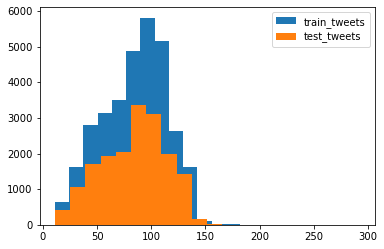

In [8]:
#check the lengthts of the distribution of text in lengths,words in train and test:
length_train=train['tweet'].str.len()
length_test=test['tweet'].str.len()
plt.hist(length_train,bins=20,label='train_tweets')
plt.hist(length_test,bins=20,label='test_tweets')
plt.legend()
plt.show()

In [9]:
#cleaning the data:
#first combine the data of train and test and split it back:
combine=train.append(test,ignore_index=True)
combine.shape

(49159, 3)

In [10]:
def  remove_pattern(text,pat):
    r=re.findall(pat,text)
    for i in r:
        text=re.sub(i,' ',text)
    return text

In [11]:
#removing everything after @:
combine['tidy_tweet']=np.vectorize(remove_pattern)(combine['tweet'],'@[\w]*')
combine.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


In [12]:
#remove punctuations ,numbers and special characters:
combine['tidy_tweet']=combine['tidy_tweet'].str.replace('[^a-zA-Z#]',' ')
combine.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can t use cause they don t offer wheelchair vans in pdx #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in ur
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation


In [13]:
#remove short words:
combine['tidy_tweet']=combine['tidy_tweet'].apply(lambda x:' '.join([w for w in x.split() if len(w)>3]))
combine.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when father dysfunctional selfish drags kids into dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks #lyft credit cause they offer wheelchair vans #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation


In [14]:
##4.Text normalization:
#tokenize:
tokenized_tweets=combine['tidy_tweet'].apply(lambda x:x.split())
tokenized_tweets


0                                                           [when, father, dysfunctional, selfish, drags, kids, into, dysfunction, #run]
1                                               [thanks, #lyft, credit, cause, they, offer, wheelchair, vans, #disapointed, #getthanked]
2                                                                                                                [bihday, your, majesty]
3                                                                                                       [#model, love, take, with, time]
4                                                                                                     [factsguide, society, #motivation]
                                                                      ...                                                               
49154                         [thought, factory, left, right, polarisation, #trump, #uselections, #leadership, #politics, #brexit, #blm]
49155                                    

In [15]:
#normalize the tokenized tweets:
from nltk.stem.porter import *
stemmer=PorterStemmer()
tokenized_tweets=tokenized_tweets.apply(lambda x:[stemmer.stem(i) for i in x])
tokenized_tweets.head(10)

0                                                            [when, father, dysfunct, selfish, drag, kid, into, dysfunct, #run]
1                                             [thank, #lyft, credit, caus, they, offer, wheelchair, van, #disapoint, #getthank]
2                                                                                                       [bihday, your, majesti]
3                                                                                              [#model, love, take, with, time]
4                                                                                                  [factsguid, societi, #motiv]
5                                       [huge, fare, talk, befor, they, leav, chao, disput, when, they, there, #allshowandnogo]
6                                                                                                       [camp, tomorrow, danni]
7    [next, school, year, year, exam, think, about, that, #school, #exam, #hate, #imagin, #actorslif, #r

In [16]:
#switch tokens back together:
for i in range(len(tokenized_tweets)):
    tokenized_tweets[i]=' '.join(tokenized_tweets[i])
combine['tidy_tweet']=tokenized_tweets
combine['tidy_tweet']

0                                             when father dysfunct selfish drag kid into dysfunct #run
1                               thank #lyft credit caus they offer wheelchair van #disapoint #getthank
2                                                                                  bihday your majesti
3                                                                           #model love take with time
4                                                                             factsguid societi #motiv
                                                     ...                                              
49154               thought factori left right polaris #trump #uselect #leadership #polit #brexit #blm
49155                       feel like mermaid #hairflip #neverreadi #formal #wed #gown #dress #mermaid
49156    #hillari #campaign today #ohio use word like asset liabil never onc #clinton thee word #radic
49157                         happi work confer right mindset lead cultur

In [17]:
#clean the data:
#we visualize the data where most common words appear at large size:
from wordcloud import WordCloud
all_words=' '.join([text for text in combine['tidy_tweet']] )
all_words

'when father dysfunct selfish drag kid into dysfunct #run thank #lyft credit caus they offer wheelchair van #disapoint #getthank bihday your majesti #model love take with time factsguid societi #motiv huge fare talk befor they leav chao disput when they there #allshowandnogo camp tomorrow danni next school year year exam think about that #school #exam #hate #imagin #actorslif #revolutionschool #girl love land #allin #cav #champion #cleveland #clevelandcavali welcom here #ireland consum price index climb from previou #blog #silver #gold #forex selfish #orlando #standwithorlando #pulseshoot #orlandoshoot #biggerproblem #selfish #heabreak #valu #love daddi today day #gettingf #cnn call #michigan middl school build wall chant #tcot comment #australia #opkillingbay #seashepherd #helpcovedolphin #thecov #helpcovedolphin ouch junior angri #got #junior #yugyoem #omg thank have paner #thank #posit retweet agre #friday smile around user #cooki make peopl know essenti oil made chemic #euro peopl 

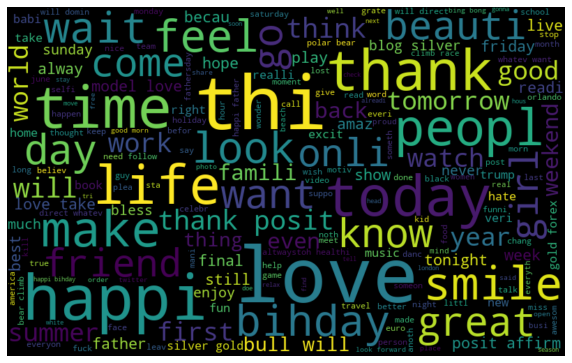

In [18]:
#visualize using wordcloud
wordcloud=WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

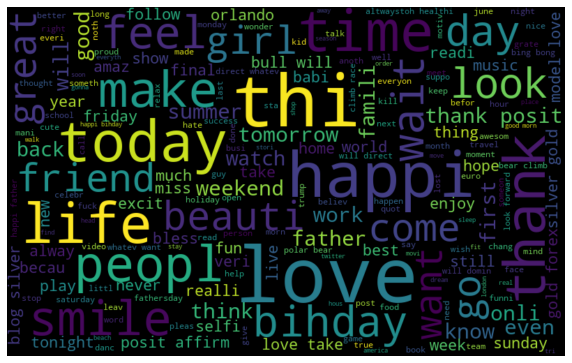

In [19]:
#words in non racist tweets:
normal_words=' '.join([text for text in combine['tidy_tweet'][combine['label']==0]])
wordcloudn=WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(normal_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloudn,interpolation='bilinear')
plt.axis('off')
plt.show()

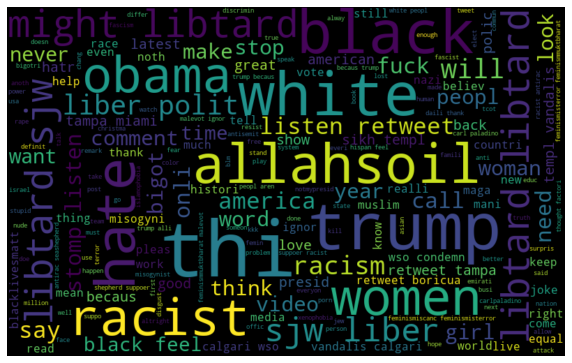

In [20]:
#visualize the racist tweets:
racist_words=' '.join([text for text in combine['tidy_tweet'][combine['label']==1]])
wordcloudr=WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(racist_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloudr,interpolation='bilinear')
plt.axis('off')
plt.show()

In [21]:
#collect hastags:
def collect_hashtags(text):
    hashtags=[]
    for i in text:
        ht=re.findall(r'#(\w+)',i)
        hashtags.append(ht)
    return hashtags
#extract from non racist:
ht_regular=collect_hashtags(combine['tidy_tweet'][combine['label']==0])
ht_neg=collect_hashtags(combine['tidy_tweet'][combine['label']==1])
ht_regular=sum(ht_regular,[])
ht_neg=sum(ht_neg,[])
len(ht_regular),len(ht_neg)


(68425, 4616)

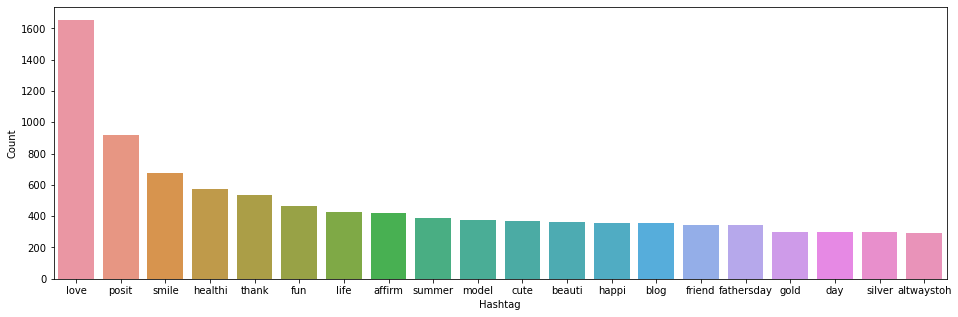

In [22]:
#now plot the tweets:
a=nltk.FreqDist(ht_regular)
d=pd.DataFrame({'Hashtag':list(a.keys()), 'Count':list(a.values())})
#select the top 20:
d=d.nlargest(columns='Count',n=20)
plt.figure(figsize=(16,5))
ax=sns.barplot(data=d,x='Hashtag',y='Count')
ax.set(ylabel='Count')
plt.show()

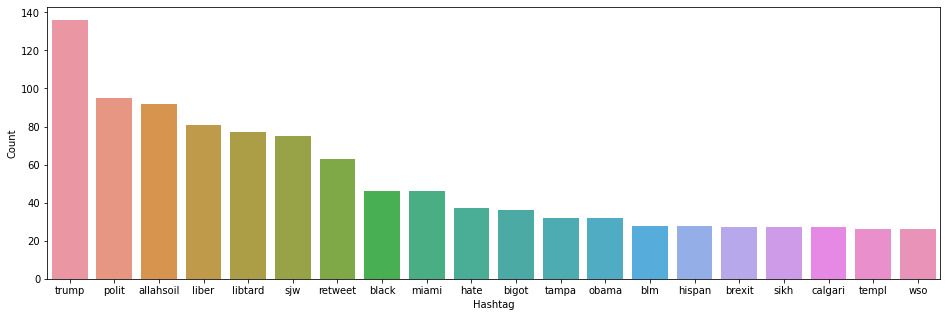

In [23]:
#now plot the tweets:
b=nltk.FreqDist(ht_neg)
e=pd.DataFrame({'Hashtag':list(b.keys()),'Count':list(b.values())})
#select the top 20:
e=e.nlargest(columns='Count', n=20)
plt.figure(figsize=(16,5))
ax=sns.barplot(data=e,x='Hashtag',y='Count')
ax.set(ylabel='Count')
plt.show()

In [24]:
#text features can be constructed using tfidf,bag of words and word embeddings:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
import gensim
bowVectorizer=CountVectorizer(max_df=0.9,min_df=2,max_features=100,stop_words='english')
bow=bowVectorizer.fit_transform(combine['tidy_tweet'])
bow.shape

(49159, 100)

In [25]:
tfidf_vectorizer=TfidfVectorizer(max_df=0.9,min_df=2,max_features=1000,stop_words='english')
tfidf=tfidf_vectorizer.fit_transform(combine['tidy_tweet'])
tfidf.shape

(49159, 1000)

In [26]:
tokenized_tweets=combine['tidy_tweet'].apply(lambda x:x.split())
model_w2v=gensim.models.Word2Vec(tokenized_tweets,size=200,window=5,min_count=2,sg=1,hs=0,negative=10,workers=2,seed=34)

In [27]:
#train the model:
model_w2v.train(tokenized_tweets,total_examples=len(combine['tidy_tweet']),epochs=20)

(6509880, 7536020)

In [28]:
#check the model efficiency:
model_w2v.wv.most_similar(positive='dinner')

[('#avocado', 0.5710275769233704),
 ('cookout', 0.5636709928512573),
 ('spaghetti', 0.557823121547699),
 ('#cellar', 0.5560409426689148),
 ('noodl', 0.5429931282997131),
 ('aladdin', 0.5399499535560608),
 ('#toast', 0.5316523909568787),
 ('#biall', 0.5275542736053467),
 ('burrito', 0.5273956656455994),
 ('spinach', 0.5239623188972473)]

In [29]:
#another check:
model_w2v.wv.most_similar(positive='trump')

[('donald', 0.5620065927505493),
 ('hillari', 0.543517529964447),
 ('phoni', 0.5390356183052063),
 ('potu', 0.5378960967063904),
 ('melo', 0.5336714386940002),
 ('#delegaterevolt', 0.529804527759552),
 ('unfit', 0.5259641408920288),
 ('jibe', 0.5258679986000061),
 ('unstabl', 0.5220515131950378),
 ('tomlin', 0.5158204436302185)]

In [30]:
#check the vector representation  of words:
model_w2v['food']

array([ 1.69915438e-01, -2.82371461e-01,  3.19189221e-01, -1.00095594e+00,
        1.31952301e-01, -1.66346863e-01, -2.96883732e-01,  6.79510683e-02,
       -1.93863928e-01, -6.83906302e-02,  1.39352577e-02,  2.69444883e-01,
        1.00556374e-01,  4.86923784e-01,  5.72799623e-01, -2.72309422e-01,
       -2.82441229e-01,  3.23229969e-01,  3.50067437e-01, -1.06254697e-01,
       -2.08789960e-01,  1.80235118e-01,  3.28007996e-01, -3.05874735e-01,
       -4.82855141e-02,  4.19052839e-01, -2.87696451e-01,  4.74992186e-01,
       -1.83520824e-01,  5.60095981e-02, -1.29588616e+00,  7.84997642e-02,
        4.90918346e-02,  2.94095784e-01, -3.19797873e-01,  6.02387309e-01,
       -3.11936080e-01,  3.49560454e-02, -3.93882245e-01, -3.11215341e-01,
        1.10484958e-01,  7.75783882e-02, -4.07636672e-01, -9.64710355e-01,
       -2.54297107e-02, -7.58487344e-01,  3.00436206e-02,  1.86875641e-01,
       -6.00603878e-01, -6.91570878e-01, -1.88337430e-01,  1.57081842e-01,
       -7.89880529e-02,  

In [31]:
def word_vector(tokens,size):
    vec=np.zeros(size).reshape((1,size))
    count=0
    for word in tokens:
        try:
            vec+=model_w2v[word].reshape((1,size))
            count+=1
        except KeyError:
            continue
    if count!=0:
        vec/=count
    return vec


In [32]:
#Preparing word2vec feature set:
w2v_arrays=np.zeros((len(tokenized_tweets),200))
for i in range(len(tokenized_tweets)):
    temp=word_vector(tokenized_tweets[i],200)
    w2v_arrays[i,:]=temp

    

In [33]:
#convert to dataframe:
w2v_df=pd.DataFrame(w2v_arrays)
w2v_df.shape

(49159, 200)

In [34]:
#doc2vector embedding:
#this is extension for word2vec: provides additional context(feature Vector for whole document)
#this documebt vector is trained along with word vector:
from tqdm import tqdm
tqdm.pandas(desc='progress-bar')
from gensim.models.doc2vec import LabeledSentence


D:\Program Files\Anaconda\lib\site-packages\tqdm\std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [35]:
#to use doc2word we need to labelise or tag each tokenized tweet with unique ids:
def add_label(twt):
    output=[]
    for i,s in zip(twt.index,twt):
        output.append(LabeledSentence(s,["tweet_"+str(i)]))
    return output
labeled_tweets=add_label(tokenized_tweets)
labeled_tweets[:6],len(labeled_tweets)


([LabeledSentence(words=['when', 'father', 'dysfunct', 'selfish', 'drag', 'kid', 'into', 'dysfunct', '#run'], tags=['tweet_0']),
  LabeledSentence(words=['thank', '#lyft', 'credit', 'caus', 'they', 'offer', 'wheelchair', 'van', '#disapoint', '#getthank'], tags=['tweet_1']),
  LabeledSentence(words=['bihday', 'your', 'majesti'], tags=['tweet_2']),
  LabeledSentence(words=['#model', 'love', 'take', 'with', 'time'], tags=['tweet_3']),
  LabeledSentence(words=['factsguid', 'societi', '#motiv'], tags=['tweet_4']),
  LabeledSentence(words=['huge', 'fare', 'talk', 'befor', 'they', 'leav', 'chao', 'disput', 'when', 'they', 'there', '#allshowandnogo'], tags=['tweet_5'])],
 49159)

In [36]:
#train doc2vec model:
model_d2v=gensim.models.Doc2Vec(dm=1,dm_mean=1,size=200,window=5,negative=7,workers=3,aplha=0.1,seed=23)
model_d2v.build_vocab([i for i in tqdm(labeled_tweets)])
model_d2v.train(labeled_tweets,total_examples=len(combine['tidy_tweet']),epochs=15)


D:\Program Files\Anaconda\lib\site-packages\gensim\models\doc2vec.py:319: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")
100%|███████████████████████████████████████████████████████████████████████| 49159/49159 [00:00<00:00, 3131839.58it/s]


In [37]:
#prepare the doc2vec feature set:
docvec_arrays=np.zeros((len(tokenized_tweets),200))
for i in range(len(combine)):
    docvec_arrays[i,:]=model_d2v.docvecs[i].reshape((1,200))
docvec_df=pd.DataFrame(docvec_arrays)
docvec_df.shape

(49159, 200)

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

In [39]:
#extract train and test bow features:
train_bow=bow[:31962,:]
test_bow=bow[31962:,:]

train_bow,test_bow

(<31962x100 sparse matrix of type '<class 'numpy.int64'>'
 	with 54778 stored elements in Compressed Sparse Row format>,
 <17197x100 sparse matrix of type '<class 'numpy.int64'>'
 	with 29310 stored elements in Compressed Sparse Row format>)

In [40]:
#split data into train and test validation:
xtrain_bow,xvalid_bow,ytrain,yvalid=train_test_split(train_bow,train['label'],random_state=42,test_size=0.3)
lreg=LogisticRegression()
lreg

LogisticRegression()

In [41]:
#train the model:
lreg.fit(xtrain_bow,ytrain)
prediction=lreg.predict_proba(xvalid_bow)
prediction

array([[9.99984349e-01, 1.56507897e-05],
       [9.72743634e-01, 2.72563663e-02],
       [9.58635792e-01, 4.13642082e-02],
       ...,
       [9.67081321e-01, 3.29186793e-02],
       [8.75070407e-01, 1.24929593e-01],
       [8.75070407e-01, 1.24929593e-01]])

In [42]:
#predict on the validation set:
prediction_int=prediction[:,1]>=0.3
prediction_int.astype(np.int)
prediction_int

array([False, False, False, ..., False, False, False])

In [43]:
#f1 score for validation set:
f1_score(yvalid,prediction_int)

0.2907103825136612

In [44]:
#prediction for the test data set:
test_pred=lreg.predict_proba(test_bow)
test_pred_int=test_pred[:,1]>=0.3
test_pred_int.astype(np.int)
test['label']=test_pred_int

In [45]:
#write to csv file:
submission=test[['id','label']]
submission.to_csv('sub_lreg_bow.csv',index=False)

In [46]:
# prediction for TF_IDF feature set:
train_tfidf=tfidf[:31962,:]
test_tfidf=tfidf[31962:,:]
xtrain_tfidf=train_tfidf[ytrain.index]
xvalid_tfidf=train_tfidf[yvalid.index]
lreg.fit(xtrain_tfidf,ytrain)
prediction=lreg.predict_proba(xvalid_tfidf)
prediction_int=prediction[:,1]>=0.3
prediction_int=prediction_int.astype(np.int)
f1_score(yvalid,prediction_int)



0.5451327433628319

In [47]:
#word2vec features:
train_w2v=w2v_df.iloc[:31962,:]
test_w2v=w2v_df.iloc[31962:,:]
xtrain_w2v=train_w2v.iloc[ytrain.index,:]
xvalid_w2v=train_w2v.iloc[yvalid.index,:]
lreg.fit(xtrain_w2v,ytrain)
prediction=lreg.predict_proba(xvalid_w2v)
prediction_int=prediction[:,1]>=0.3
prediction_int=prediction_int.astype(np.int)
f1_score(yvalid,prediction_int)


0.6162962962962962

In [48]:
#doc2vec features:
train_d2v=docvec_df.iloc[:31962,:]
test_d2v=docvec_df.iloc[31962:,:]
xtrain_d2v=train_d2v.iloc[ytrain.index,:]
xvalid_d2v=train_d2v.iloc[yvalid.index,:]
lreg.fit(xtrain_d2v,ytrain)
prediction=lreg.predict_proba(xvalid_d2v)
prediction_int=prediction[:,1]>=0.3
prediction_int=prediction_int.astype(np.int)
f1_score(yvalid,prediction_int)


0.35924932975871315

## using svm

In [49]:
## 
from sklearn import svm
#bag of words:
svc=svm.SVC(kernel='linear',C=1,probability=True).fit(xtrain_bow,ytrain)
prediction=svc.predict_proba(xvalid_bow)
prediction_int=prediction[:,1]>=0.3
prediction_int=prediction_int.astype(np.int)
f1_score(yvalid,prediction_int)

0.22222222222222227

In [50]:
#prediction for test set:t
test_pred=svc.predict_proba(test_bow)
test_pred_int=test_pred[:,1]>=0.3
test_pred_int=test_pred_int.astype(np.int)
test['label']=test_pred_int
submission=test[['id','label']]
submission.to_csv('sub_svm_bow.csv',index=False)

In [51]:
#TF_IDF FEATURES:
svc=svm.SVC(kernel='linear',C=1,probability=True).fit(xtrain_tfidf,ytrain)
prediction=svc.predict_proba(xvalid_tfidf)
prediction_int=prediction[:,1]>=0.3
prediction_int=prediction_int.astype(np.int)
f1_score(yvalid,prediction_int)

0.5122615803814715

In [52]:
#word2vec features:
svc=svm.SVC(kernel='linear',C=1,probability=True).fit(xtrain_w2v,ytrain)
prediction=svc.predict_proba(xvalid_w2v)
prediction_int=prediction[:,1]>=0.3
prediction_int=prediction_int.astype(np.int)
f1_score(yvalid,prediction_int)

0.609907120743034

In [53]:
#doct2vec features f1_score:
svc=svm.SVC(kernel='linear',C=1,probability=True).fit(xtrain_d2v,ytrain)
prediction=svc.predict_proba(xvalid_d2v)
prediction_int=prediction[:,1]>=0.3
prediction_int=prediction_int.astype(np.int)
f1_score(yvalid,prediction_int)

0.3466666666666667

## random forest regression:

In [54]:

from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=400,random_state=11).fit(xtrain_bow,ytrain)
prediction=rf.predict(xvalid_bow)
f1_score(yvalid,prediction)

0.2913472070098576

In [55]:
test_pred=rf.predict(test_bow)
test['label']=test_pred
submission=test[['id','label']]
submission.to_csv('sub_rf_bow.csv',index=False)

In [56]:
#tf_idf features:
rf=RandomForestClassifier(n_estimators=400,random_state=11).fit(xtrain_tfidf,ytrain)
prediction=rf.predict(xvalid_tfidf)
f1_score(yvalid,prediction)

0.562152133580705

In [57]:
#word_to_vec featueres:
rf=RandomForestClassifier(n_estimators=400,random_state=11).fit(xtrain_w2v,ytrain)
prediction=rf.predict(xvalid_w2v)
f1_score(yvalid,prediction)

0.5222929936305734

In [58]:
#doc_to_vec features:
rf=RandomForestClassifier(n_estimators=400,random_state=11).fit(xtrain_d2v,ytrain)
prediction=rf.predict(xvalid_d2v)
f1_score(yvalid,prediction)

0.31063321385902026

## xgboost

In [59]:
#its advanced(extreme) gradient boosting algorithm;
#it has linear solver and tree learning algorithm
from xgboost import XGBClassifier
xgb_model=XGBClassifier(max_depth=6,n_estimators=1000).fit(xtrain_bow,ytrain)
prediction=xgb_model.predict(xvalid_bow)
f1_score(yvalid,prediction)



0.2482598607888631

In [60]:
#tf_idf feature:
xgb=XGBClassifier(max_depth=6,n_estimators=1000).fit(xtrain_tfidf,ytrain)
prediction=xgb.predict(xvalid_tfidf)
f1_score(yvalid,prediction)


0.5394265232974911

In [61]:
#word2vec features:
xgb=XGBClassifier(max_depth=6,n_estimators=1000,n_thread=3).fit(xtrain_w2v,ytrain)
prediction=xgb.predict(xvalid_w2v)
f1_score(yvalid,prediction)


[20:58:05] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { n_thread } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




0.6509186351706037

In [62]:
#doctovec features:
xgb=XGBClassifier(max_depth=6,n_estimators=1000).fit(xtrain_d2v,ytrain)
prediction=xgb.predict(xvalid_d2v)
f1_score(yvalid,prediction)

0.4803149606299213

## fine tuning xgbboost and wordtovec

In [63]:
import xgboost as xgb
#DMatrix contains both features and target 
dtrain=xgb.DMatrix(xtrain_w2v,label=ytrain)
dvalid=xgb.DMatrix(xvalid_w2v,label=yvalid)
dtest=xgb.DMatrix(test_w2v)

In [64]:
#parameters that we are going to tune:
params={
    'objective':'binary:logistic',
    'max_depth':6,
    'min_child_weight':1,
    'eta':0.3,
    'subsample':1,
    'colsample_bytree':1
}
#custome eval metrics to calculate f1_score:
def custom_eval(preds,dtrain):
    labels=dtrain.get_label().astype(np.int)
    preds=(preds>=0.3).astype(np.int)
    return [('f1_score',f1_score(labels,preds))]



In [65]:
#approach for parameter tuning:
#1.high learning rate(0.3)
#keepinr lr fixed change min_child_weight,subsample
#3.tune learning rate:
#4.finally tune gamma to avoid overfitting:



#### tune max_depth and min_child_weight:

In [66]:

gridsearch_params=[
    (max_depth,min_child_weight)
    for max_depth in range(6,10)
    for min_child_weight in range(5,8)
]
max_f1=0.
best_params=None
for max_depth,min_child_weight in gridsearch_params:
    print('CV with max depth={},min_child_weiht={}'.format(max_depth,min_child_weight))
    #update parameters:
    params['max_depth']=max_depth
    params['min_child_weight']=min_child_weight
    #cross validation:
    cv_results=xgb.cv(params,dtrain,feval=custom_eval,num_boost_round=200,maximize=True,seed=16,nfold=5,
                  early_stopping_rounds=10)
    #finding best f1_score:
    mean_f1=cv_results['test-f1_score-mean'].max()
    boost_rounds=cv_results['test-f1_score-mean'].argmax()
    print('\tf1 score {} for {} rounds'.format(mean_f1,boost_rounds))
    if mean_f1>max_f1:
        max_f1=mean_f1
    best_params=(max_depth,min_child_weight)
    

CV with max depth=6,min_child_weiht=5
	f1 score 0.6446485999999999 for 64 rounds
CV with max depth=6,min_child_weiht=6
	f1 score 0.6409636000000001 for 65 rounds
CV with max depth=6,min_child_weiht=7
	f1 score 0.6510828 for 93 rounds
CV with max depth=7,min_child_weiht=5
	f1 score 0.6557832 for 103 rounds
CV with max depth=7,min_child_weiht=6
	f1 score 0.6448358000000001 for 82 rounds
CV with max depth=7,min_child_weiht=7
	f1 score 0.652699 for 92 rounds
CV with max depth=8,min_child_weiht=5
	f1 score 0.6509782 for 77 rounds
CV with max depth=8,min_child_weiht=6
	f1 score 0.6309958 for 48 rounds
CV with max depth=8,min_child_weiht=7
	f1 score 0.655077 for 125 rounds
CV with max depth=9,min_child_weiht=5
	f1 score 0.6438649999999999 for 46 rounds
CV with max depth=9,min_child_weiht=6
	f1 score 0.6469547999999999 for 80 rounds
CV with max depth=9,min_child_weiht=7
	f1 score 0.6436714 for 82 rounds


In [67]:
print('Best params:{},{},F1 score: {}'.format(best_params[0],best_params[1],max_f1))

Best params:9,7,F1 score: 0.6557832


In [68]:
#update the max_depth and min_child_weight parameters:
params['max_depth']=9
params['min_child_weight']=7

#### tuning subsample and colsample:

In [69]:
gridsearch_params=[(subsample,colsample) for subsample in [i/10. for i in range(5,10)]
                                         for colsample in [i/10. for i in range(5,10)] ]
max_f1=0.
best_params=None
for subsample,colsample in gridsearch_params:
    print('cv with subsample={},colsample={}'.format(subsample,colsample))
    params['colsample']=colsample
    params['subsample']=subsample
    #cross validation:
    cv_results=xgb.cv(params,dtrain,feval=custom_eval,num_boost_round=200,maximize=True,seed=16,nfold=5,
                  early_stopping_rounds=10)
    #finding best f1_score:
    mean_f1=cv_results['test-f1_score-mean'].max()
    boost_rounds=cv_results['test-f1_score-mean'].argmax()
    print('\tf1 score {} for {} rounds'.format(mean_f1,boost_rounds))
    if mean_f1>max_f1:
        max_f1=mean_f1
    best_params=(subsample,colsample)
    

cv with subsample=0.5,colsample=0.5
[21:13:37] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { colsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:13:37] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { colsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:13:37] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { colsample } might not be used.

  This may not be accurate due to some par

In [70]:
print('Best params:{},{},F1 score: {}'.format(best_params[0],best_params[1],max_f1))

Best params:0.9,0.9,F1 score: 0.6558615999999999


In [71]:
#updating subsample  and colsample_bytree:
params['subsample']=.9
params['colsample_bytree']=.5


#### tune the learing rate:

In [72]:
max_f1=0.
best_params=None
for eta in [.3,.2,.1,.05,.01,.005]:
    print('cv with eta={}'.format(eta))
    #update eta:
    params['eta']=eta
    #cross validation:
    cv_results=xgb.cv(params,dtrain,feval=custom_eval,num_boost_round=1000,maximize=True,seed=16,nfold=5,
                  early_stopping_rounds=20)
    #finding best f1_score:
    mean_f1=cv_results['test-f1_score-mean'].max()
    boost_rounds=cv_results['test-f1_score-mean'].argmax()
    print('\tf1 score {} for {} rounds'.format(mean_f1,boost_rounds))
    if mean_f1>max_f1:
        max_f1=mean_f1
        best_params=eta
    print('best params: {},F1 score: {}'.format(best_params,max_f1))
    
    

cv with eta=0.3
[21:34:12] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { colsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:34:12] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { colsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:34:12] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { colsample } might not be used.

  This may not be accurate due to some parameters are only use

In [73]:
params

{'objective': 'binary:logistic',
 'max_depth': 9,
 'min_child_weight': 7,
 'eta': 0.005,
 'subsample': 0.9,
 'colsample_bytree': 0.5,
 'colsample': 0.9}

In [74]:
xgb_model=xgb.train(params,dtrain,feval=custom_eval,num_boost_round=1000,maximize=True,
                    evals=[(dvalid,"validation")],early_stopping_rounds=10)


[21:44:30] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { colsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation-error:0.06507	validation-f1_score:0.00000
Multiple eval metrics have been passed: 'validation-f1_score' will be used for early stopping.

Will train until validation-f1_score hasn't improved in 10 rounds.
[1]	validation-error:0.05631	validation-f1_score:0.00000
[2]	validation-error:0.05631	validation-f1_score:0.00000
[3]	validation-error:0.05527	validation-f1_score:0.00000
[4]	validation-error:0.05527	validation-f1_score:0.00000
[5]	validation-error:0.05423	validation-f1_score:0.00000
[6]	validation-error:0.05412	validation-f1_score:0.00000
[7]	validation-error:0.05433	validation-f1_score:0.

In [75]:
#final submission final:
test_pred=xgb_model.predict(dtest)
test['label']=(test_pred>=0.3).astype(np.int)
submission=test[['id','label']]
submission.to_csv('sub_xgb_w2v_finetuned.csv',index=False)


In [76]:
print('hello')

hello
